In [1]:
#Importa as bibliotecas
import numpy
import init

from analisys.bkt_analisys import *
from analisys.data_analisys import *
from analisys.graph_analisys import *
from analisys.optmizer_analisys import *


import pandas as pd
import seaborn as sb
import random
import os

from backend.resampler import *
from backend.mt5_tools import *

from statsmodels.tsa.stattools import adfuller
from analisys.graph_analisys import moving_avg

from scipy.optimize import rosen, differential_evolution

In [2]:
def cointpair_selection(hist, dataframe, lags):

    co = h_coint(hist, dataframe, n_lags=lags)
    co = pd.DataFrame(co)
    co = co.sort_values(by=['pvalue'])
    co = co.reset_index(drop=True)

    new_co = pd.DataFrame({'pvalue':pd.Series([]), 'stdx':pd.Series([]), 
                                'stdy':pd.Series([]), 'x':pd.Series([]), 'y':pd.Series([])})


    if(len(co) == 0):
        return new_co

    co_len = [i for i in range(len(co))]

    for j in co_len:

        x,y = list(co['x'])[j], list(co['y'])[j]

        if not((x in list(new_co['x'])) or (x in list(new_co['y'])) or 
                    (y in list(new_co['x'])) or (y in list(new_co['y']))):

            new_co = new_co.append(co.iloc()[j])

    new_co = new_co.reset_index(drop=True)



    return new_co

In [3]:
#pega os dados historicos
hist_treino = mt5_historicaldata_s(30, '2021.05.01', '2021.05.25', csv_list='symbols.csv')
hist_test = mt5_historicaldata_s(30, '2021.05.25', '2021.05.30', csv_list='symbols.csv')
hist_treino

co = cointpair_selection(hist_treino, 5, lags = 1)



['BBAS3']


In [4]:
co

,pvalue,stdx,stdy,x,y


In [5]:
name_x= 'ABEVF160'
name_y= 'ABEVF165'

In [6]:

period = [10,150]
stop_n = [25,50]
stop_r = [-300, 0]
s_spread = [0, 5]
l_spread = [-5, 0]
tp_s =[-1, 0]
tp_l =[0, 1]
tp_r =[700, 3000]



df_treino = hist_treino
df_test = hist_test

print(name_x, name_y)

space_param = [(period[0], period[1]),
             (s_spread[0], s_spread[1]),
             (l_spread[0], l_spread[1]),
             (tp_s[0], tp_s[1]),
             (tp_l[0], tp_l[1]),
             (tp_r[0], tp_r[1]),
             (stop_n[0], stop_n[1]),
             (stop_r[0], stop_r[1])]



ABEVF160 ABEVF165


In [7]:
opt_param = 'roi'

def simplebkt(  symbol_x,
                symbol_y,
                name_x,
                name_y,
                _period,
                s_spread,
                l_spread,
                tp_s,
                tp_l,
                tp_r,
                stop_n,
                stop_r,
                pos_size=5000):

    #fname = '{}x{}x{}{}{}.json'.format(name_x, name_y, datetime.datetime.now().hour, datetime.datetime.now().minute, datetime.datetime.now().second)

    dic = runbkt(symbol_x, symbol_y, name_x, name_y, _period,s_spread, l_spread, tp_s, tp_l, tp_r, stop_n, stop_r, pos_size)
    return dic['profit']

def treino(x, name_x, name_y, df_treino):

    _p, shortspread, longspread, takeprofitshort, takeprofitlong, takeprofitreturn, stopnumber, stopreturn = x
    name_x, name_y, df_treino = arg
    r = simplebkt(df_treino[name_x], df_treino[name_y], name_x, name_y, _p, shortspread, longspread, takeprofitshort, takeprofitreturn, takeprofitlong, stopnumber, stopreturn)
    return -r

result_opttrain = forestbkt(name_x, name_y, hist_treino, hist_test, n=35, opt_param='roi', pos_size=5000, space=space_param)

#a,b,c,d,e,f,g,h = param

#forest = runbkt(df_test[name_x], df_test[name_y], name_x, name_y, a,b,c,d,e,f,g,h, 300)


ValueError: too many values to unpack (expected 7)

0

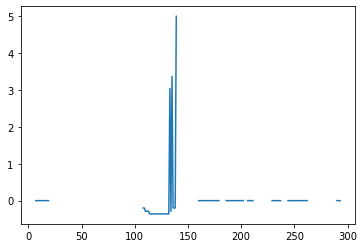

In [ ]:
result_opttrain.keys()
plt.plot(result_opttrain['test']['spread'])
sum(result_opttrain['test']['returns'])

In [ ]:
#Roda otimização de parametros
bounds = space_param
arg = [name_x, name_y, df_treino]




In [ ]:
result_differential = differential_evolution(treino, bounds, args = [name_x, name_y, df_treino], updating='deferred',
                                workers=8, disp=True, maxiter = 10)




differential_evolution step 1: f(x)= -951
differential_evolution step 2: f(x)= -951
differential_evolution step 3: f(x)= -1179
differential_evolution step 4: f(x)= -1179
differential_evolution step 5: f(x)= -1188
differential_evolution step 6: f(x)= -1188
differential_evolution step 7: f(x)= -1188
differential_evolution step 8: f(x)= -1188
differential_evolution step 9: f(x)= -1188
differential_evolution step 10: f(x)= -1188


In [ ]:
a,b,c,d,e,f,g,h = result_differential['x']

res = runbkt(df_test[name_x], df_test[name_y], name_x, name_y, a, b, c, d, e, f, g, h, p_size = 300)

print(forest['returns'], res['returns'], result_differential['x'])

[-26.99999999999889] [] [ 92.10215521   2.82797865  -2.44595573   1.97618155   1.43612443
 200.10253578  43.4833092  -27.66829584]
